In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import scipy.optimize as so
from sympy import *
from functions_Finite_Difference import gauss

## Create more realistic initial and boundary conditions  
-Periodic boundary condition on temperature at the surface to show diurnal cycle. 

-And initial conditions changed, mean value at the surface

In [42]:
#PARAMETERS
#________________________________________________________
dx=1
dX=0.1
limx=100
XX=np.arange(0,limx,dX)
xx=np.arange(0,limx,dx)

    #time domain  (hours)
limt=182*1  #hours
dt=1/60    # minute step
tt=np.arange(0,limt,dt)


s=5  #standard dev   gaussian
mu=0   #gaussian mean    #  <--------------------------- peak of gaussian function at the surface because source of heating there
K=0.6  #thermal conductivity of soil

In [65]:
#surface temperature boundary condition
def temp_cycle (tt,dt):

    omega = 2*np.pi/(24) # period (minutes)
    temp = 5 * ( 1.5 + np.sin(omega*tt) ) #amplitude 

    m_series = np.empty(len(tt)) 
    m = 0.

    for i in range(len(tt)):
        m = m + (temp[i] - 0.5 * m)*dt
        m_series[i] = m
    return m_series

In [66]:
def euler_f_BC_periodic(dx,dt,limx,limt,K):    #euler forward modified to have periodic boundary conditions at the surface
#PARAMETERS
#________________________________________________________
    dX=0.1
    limx=100
    xx=np.arange(0,limx,dx)

    tt=np.arange(0,limt,dt)

#variables 
    s=5  #standard dev   gaussian
    mu=0   #moyenne gaussienne 
    K=0.6
#_________________________________

    Tf=np.zeros((len(tt),len(xx)))
    Tf[0,:]=gauss(xx, mu, s)
    
    #Surface boundary conditions
    Tf[:,0]=temp_cycle(tt,dt)  #<------------------ Diurnal cycle for temperature at the surface
    

    for i in range(0,len(tt)-1):
        for j in range(1,len(xx)-1):
            Tf[i+1,j]=Tf[i,j]+(K*dt/(dx**2))*(Tf[i,j+1]+Tf[i,j-1]-2*Tf[i,j])
        
    return Tf
    

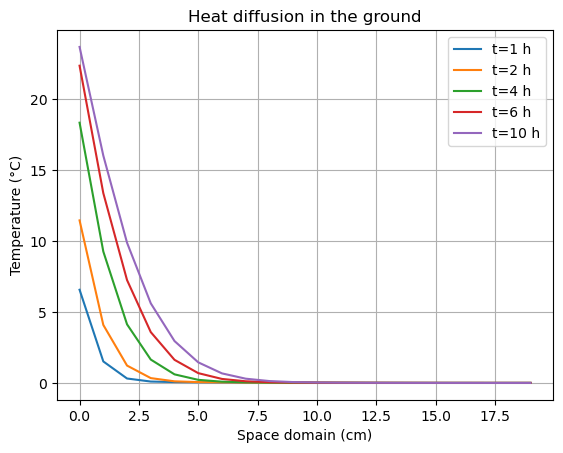

In [67]:
Tf=euler_f_BC_periodic(dx,dt,limx,limt,K)
plt.plot(xx[0:20],Tf[1*60,0:20],label='t='+str(1)+' h')
plt.plot(xx[0:20],Tf[2*60,0:20],label='t='+str(2)+' h')
plt.plot(xx[0:20],Tf[4*60,0:20],label='t='+str(4)+' h')
plt.plot(xx[0:20],Tf[6*60,0:20],label='t='+str(6)+' h')
plt.plot(xx[0:20],Tf[8*60,0:20],label='t='+str(10)+' h')
plt.legend()
plt.xlabel('Space domain (cm)')
plt.ylabel('Temperature (°C)')
plt.grid()
plt.title('Heat diffusion in the ground')
plt.savefig('BCtemp_h.png',dpi=300)

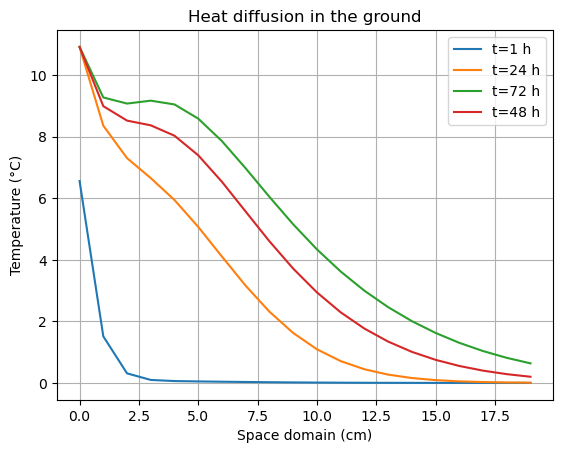

In [68]:
plt.plot(xx[0:20],Tf[1*60,0:20],label='t='+str(1)+' h')
plt.plot(xx[0:20],Tf[24*60,0:20],label='t='+str(24)+' h')
plt.plot(xx[0:20],Tf[72*60,0:20],label='t='+str(72)+' h')
plt.plot(xx[0:20],Tf[48*60,0:20],label='t='+str(48)+' h')
plt.legend()
plt.xlabel('Space domain (cm)')
plt.ylabel('Temperature (°C)')
plt.grid()
plt.title('Heat diffusion in the ground')
plt.savefig('BCtemp_jours.png',dpi=300)

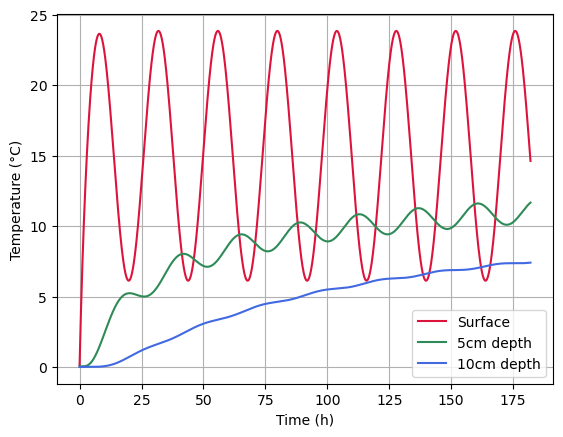

In [69]:
plt.plot(tt,Tf[:,0],label='Surface',color='crimson')
plt.plot(tt,Tf[:,5],label='5cm depth',color='seagreen')
plt.plot(tt,Tf[:,10],label='10cm depth',color='royalblue')

plt.legend()
plt.xlabel('Time (h)')
plt.ylabel('Temperature (°C)')
plt.grid()
plt.savefig('Temp_cycle_prof.png',dpi=300)